# Meow Mood Prediction

&emsp;&emsp;&emsp;
ตัวอย่างนี้จะเป็นการทำนายความรู้สึกของแมวจากเสียง โดยในการเทรนโมเดลสำหรับการทำนาย จะมีการเก็บข้อมูลเสียงและบันทึกความรู้สึกต่างๆ แบ่งเป็น 3 กลุ่มได้แก่
1. Meow sound : เสียงปกติ
2. Distress sound : เสียงตกใจ
3. Purring sound : เสียงคราง
<br></br>
**การเก็บข้อมูลเสียง**

&emsp;&emsp;&emsp;
ทำการบันทึกเสียงของแมวความยาวประมาณ 2 วินาที และป้อนค่ากลุ่มของความรู้สึก โดยใช้อุปกรณ์ micro:bit
และจดบันทึกเป็นค่าเริ่มต้น หลังจากนั้นทำการเก็บค่าอย่างน้อยกลุ่มละ 30 ครั้ง เพื่อเก็บเป็นข้อมูลสำหรับการทำนาย
<br></br>
**การเรียนรู้โค้ด**

&emsp;&emsp;&emsp;
ในตัวอย่างนี้ได้ทำการรวบรวมผลการทดลองจำนวนทั้งสิ้น 100 ค่าเพื่อใช้ในการทำนายความรู้สึกของแมว โดยใช้อุปกรณ์ micro:bit ส่งสัญญาณค่าเสียง (sound) ที่ได้รับมาจาก IoT Kit ไปยังคอมพิวเตอร์ผ่านสาย USB เพื่อใช้ในการทำนายความรู้สึกของแมว (feeling) โดยใช้ Random Forest Classifier Model ในการประมวลผลผ่าน Google Colab
<br></br>

**สิ่งที่ต้องเตรียม**
1. อุปกรณ์ micro:bit* 1 ชิ้น ใช้ได้ทั้ง version 1 และ 2
2. ชุดอุปกรณ์ IoT Kit 1 ชุด ประกอบด้วย OLED Screen, Sound sensor, และ IoT:bit
3. สาย micro USB 1 เส้น เพื่อเชื่อมต่ออุปกรณ์เข้ากับคอมพิวเตอร์
4. คอมพิวเตอร์โน๊ตบุ๊ค 1 เครื่อง ที่ลงโปรแกรม Google Chrome และสามารถใช้อินเตอร์เน็ตได้

****หมายเหตุ*** การเขียนโปรแกรม hex ที่ใช้สำหรับอุปกรณ์ micro:bit แต่ละรุ่นมีความแตกต่างกัน ขอให้ตรวจสอบรุ่นของอุปกรณ์ให้ตรงกับคู่มือ (ในขั้นตอนที่ 1)
<br></br>
&emsp;&emsp;&emsp;
ซึ่งขั้นตอนการนำข้อมูลมาผ่านโปรแกรมทำนายความรู้สึกของแมว ได้สรุปเอาไว้ 8 ขั้นตอนหลัก ดังนี้

**ขั้นตอนที่ 1** การเตรียมอุปกรณ์ micro:bit

**ขั้นตอนที่ 2** การเตรียมโปรแกรมสำหรับอุปกรณ์ micro:bit

**ขั้นตอนที่ 3** การเก็บข้อมูลในรูปแบบตาราง ด้วยอุปกรณ์ micro:bit สำหรับใช้ในการทดลอง

**ขั้นตอนที่ 4** การเก็บข้อมูลการทดลองจาก micro:bit เพื่อใช้ในการเทรนโมเดล

**ขั้นตอนที่ 5** การเลือกชุดข้อมูลและจัดรูปแบบข้อมูลให้อยู่ในรูป DataFrame

**ขั้นตอนที่ 6** แสดงตัวอย่างชุดข้อมูลเสียงที่ใช้ในการเทรนโมเดล

**ขั้นตอนที่ 7** การเทรนโมเดล

**ขั้นตอนที่ 8** การทำนายผลค่าต่างๆที่ได้รับจาก Micro:Bit ผ่านโมเดลที่เตรียมไว้





### **ขั้นตอนที่ 1** การเตรียมอุปกรณ์ micro:bit เพื่อใช้วัดค่าและส่งสัญญาณโต้ตอบผ่านสาย USB

&emsp;&emsp;&emsp;
เริ่มต้นโดยประกอบอุปกรณ์เข้าด้วยกัน ดังขั้นตอนต่อไปนี้

a.   ใส่แบตเตอรี่ขนาด CR1220 จำนวน 1 ก้อนลงในอุปกรณ์ IoT:bit

b.   เสียบ micro:bit เข้ากับ IoT:bit โดยหันด้านหน้าขึ้นด้านบน

c.   เสียบ OLED Screen เข้ากับ IoT:bit

d.   ต่อสาย pair เข้ากับอุปกรณ์ Sound Sensor โดยเสียบอีกด้านเข้ากับ pin1

e.   ต่อสาย USB เข้ากับ micro:bit
<br></br>
&emsp;&emsp;&emsp;
โดยดูตัวอย่างจากรูปประกอบ
<br></br>
![iotbit_workflow.png](https://raw.github.com/hengkp/microbit_ml_examples/main/meow%20mood%20prediction/iotbit_workflow.png)
<br><br>

### **ขั้นตอนที่ 2** การเตรียมโปรแกรมสำหรับอุปกรณ์ micro:bit

&emsp;&emsp;&emsp;
ในส่วนนี้จะขึ้นอยู่กับรุ่นของ micro:bit ที่ใช้งาน (สามารถตรวจสอบรุ่นได้ที่ตัว micro:bit ซึ่งจะสลักอักษร v1 หรือ v2 ไว้ใกล้กับชื่อแบรนด์) โดยขั้นตอนนี้จะเป็นการเขียนโปรแกรม Python เพื่อให้ตัว micro:bit สื่อสารกับคอมพิวเตอร์ผ่านสาย USB ในการรับคำสั่งเป็นตัวอักษรจากคอมพิวเตอร์ จากนั้นตัว micro:bit จะเก็บค่าและส่งกลับมายังคอมพิวเตอร์
<br></br>
&emsp;&emsp;&emsp;
โดยมีขั้นตอนการเตรียมโปรแกรมดังต่อไปนี้
<br></br>
2.1 เสียบสาย USB จากอุปกรณ์ micro:bit ที่เตรียมไว้เข้ากับเครื่องคอมพิวเตอร์

2.1 ดาวน์โหลดไฟล์ทั้งหมดจาก GitHub โดยเข้าไปที่ [microbit_ml_examples](https://github.com/hengkp/microbit_ml_examples)

2.2 กดปุ่ม **"<> code"** แล้วเลือก **"Download ZIP"** เพื่อเก็บข้อมูลจาก GitHub ลงในคอมพิวเตอร์

2.3 แตกไฟล์ ZIP บนคอมพิวเตอร์ แล้วเข้าไปที่โฟลเดอร์ ชื่อว่า **"meow mood prediction"**

2.4 ภายในโฟลเดอร์จะมีไฟล์ hex ชื่อว่า **"microbit-meow-mood-prediction.hex"**

2.5 เปิดโปรแกรม Google Chrome และเข้าไปที่เว็บ [Microsoft MakeCode](https://makecode.microbit.org) เพื่อเปิดไฟล์

2.6 โดยกดปุ่ม **"Import"** ที่มุมขวาบนในหน้าเว็บและเลือกไฟล์ hex ที่ต้องการเปิด

2.6 คลิกปุ่มจุดสามจุด (อยู่ข้างปุ่ม Download) และเลือก "Connect Device" เพื่อเชื่อมต่อ micro:bit

2.7 คลิกปุ่ม Download เพื่อโหลดชุดโค้ดลง micro:bit
<br></br>
&emsp;&emsp;&emsp;
ตัวอย่างโค้ดแบบ Block สำหรับอุปกรณ์ micro:bit
<br></br>
![microbit_workflow.png](https://raw.github.com/hengkp/microbit_ml_examples/main/meow%20mood%20prediction/microbit_workflow.png)
<br></br>

### **ขั้นตอนที่ 3** การเก็บข้อมูลตารางแบบ CSV ด้วยอุปกรณ์ micro:bit สำหรับใช้ในการทดลอง

&emsp;&emsp;&emsp;
ในขั้นตอนนี้ จะเป็นการใช้อุปกรณ์ micro:bit ที่เตรียมไว้ นำมาใช้เก็บข้อมูลการทดลอง โดยมีชั้นตอนดังต่อไปนี้

3.1 เตรียมอุปกรณ์ micro:bit ตามขั้นตอนที่ 1

3.2 เตรียมโปรแกรมใส่ใน micro:bit ตามขั้นตอนที่ 2

3.3 จัดเตรียมชุดการทดลอง โดยจัดเตรียมแหล่งเสียงของแมว (อาจเป็นไฟล์เสียงในมือถือ เพื่อเปิดผ่านลำโพง)

3.4 กดคำสั่งรันใน **ขั้นตอนที่ 4** เพื่อเริ่มต้นการทำงานของชุดคำสั่งสำหรับเชื่อมต่อ micro:bit เข้ากับ Notebook

3.5 กดปุ่ม <font color='#4CAF50'>**Connect Micro:Bit** (สีเขียว)</font> เพื่อเชื่อมต่ออุปกรณ์ เมื่อเชื่อมต่อสำเร็จ ปุ่มดังกล่าวจะเปลี่ยนเป็นคำว่า <font color='#4CAF50'>**Disconnect Micro:Bit** (สีเขียว)</font>

3.6 ทำการวัดค่าเสียงปกติของแมว\* (กลุ่มที่ 1) โดยกดปุ่ม <font color='#2196F3'>**Get data** (สีน้ำเงิน)</font> เพื่อบันทึกข้อมูล **(input_data)** โดยกะจังหวะเปิดไฟล์เสียงให้ตรงกับเสียงที่ต้องการบันทึก ซึ่งหลังจากกดปุ่มแล้ว จะมี <strong>เสียงสัญญาณจาก Micro:Bit ทั้งหมด 2 ครั้ง</strong> โดยครั้งที่ 1 เพื่อให้สัญญาณเริ่มต้นการบันทึก และครั้งที่ 2 จะบอกถึงเวลาสิ้นสุดการบันทึก  โดยจะมี <strong>ระยะเวลา ~2 วินาที</strong> (ถ้าข้อมูลถูกบันทึกจะขึ้นค่าในตาราง) โดยกดซ้ำเพื่อเก็บข้อมูล 3 ครั้ง

3.7 เปลี่ยนไฟล์เสียงเป็นกลุ่มที่ 2\* และปรับเพิ่มค่า feeling **(label_class)** ใน micro:bit ให้มีค่าเท่ากับ 2 โดยกดปุ่ม <font color='#F44336'>**Decrease ▼** (สีแดง)</font> เพื่อลดปริมาณ หรีอ <font color='#FF9800'>**Increase ▲** (สีเหลือง)</font> เพื่อเพิ่มปริมาณ จากนั้นให้กดปุ่ม <font color='#2196F3'>**Get data** (สีน้ำเงิน)</font> เพื่อบันทึกข้อมูล **(input_data)** โดยกดซ้ำเพื่อเก็บข้อมูล 3 ครั้ง

3.8 ทำซ้ำขั้นตอน 3.7 เพื่อบันทึกค่า **(input_data)** โดยไฟล์เสียงเป็นกลุ่มที่ 3\* และสลับกลุ่มของข้อมูลเสียง จนกระทั่งครบ 30 ชุดข้อมูล

3.9 ในกรณีค่าที่ได้รับจาก micro:bit ไม่สมบูรณ์หรือมีข้อผิดพลาด ให้กดปุ่ม <font color='#FF5722'>**Remove Latest Row** (สีส้ม)</font> เพื่อลบข้อมูลบรรทัดนั้น ซึ่งข้อมูลที่เหลืออยู่จะแสดงในตาราง

3.10 เมื่อเสร็จสิ้นการทดลอง ให้กดปุ่ม <font color='#4CAF50'>**Disconnect Micro:Bit** (สีเขียว)</font> เพื่อยกเลิกการเชื่อมต่อเสมอ
<br></br>
&emsp;&emsp;&emsp;
**หมายเหตุ** ในกรณีที่ต้องการกลับมาเก็บค่าเพิ่มเติม สามารถกดปุ่ม <font color='#4CAF50'>**Connect Micro:Bit** (สีเขียว)</font> ได้โดยไม่ต้องกดปุ่มรันในขั้นตอนที่ 3.4 ใหม่ เนื่องจาก ทุกครั้งที่กดรันจะรีเซ็ตค่าเดิมที่เคยเก็บไว้ทั้งหมด ทำให้ข้อมูลหายได้
<br></br>

&emsp;&emsp;&emsp;
\*ฟังตัวอย่างเสียงได้จากไฟล์เสียงที่อยู่ในโฟลเดอร์ โดยมี 3 ไฟล์ ดังต่อไปนี้
<ul><li>สำหรับ กลุ่มที่ 1 มีชื่อไฟล์ว่า <strong>"sound_meow.mp3"</strong></li>
<li>สำหรับ กลุ่มที่ 2 มีชื่อไฟล์ว่า <strong>"sound_distress.mp3"</strong></li>
<li>สำหรับ กลุ่มที่ 3 มีชื่อไฟล์ว่า <strong>"sound_purring.mp3"</strong></li></ul>


In [ ]:
#@title **ขั้นตอนที่ 4** การเก็บข้อมูลการทดลองจาก micro:bit เพื่อใช้ในการเทรนโมเดล
#@markdown สามารถกดรันเพื่อเชื่อมต่อและสั่งการได้เลย โดยประกอบด้วย 5 ปุ่ม ดังต่อไปนี้
#@markdown <ol>4.1 กดปุ่ม <font color="#4CAF50"><strong>Connect Micro:Bit</strong></font> จากนั้น เลือกเชื่อมต่อกับอุปกรณ์ <br>
#@markdown 4.2 กดปุ่ม <font color="#FF5722"><strong>Remove Latest Row</strong></font> เมื่อต้องการลบข้อมูลในแถวสุดท้าย<br>
#@markdown 4.3 กดปุ่ม <font color="#2196F3"><strong>Get data</strong></font> เพื่อ เก็บข้อมูลแบบเรียลไทม์<br>
#@markdown 4.4 กดปุ่ม <font color="#F44336"><strong>Decrease ▼</strong></font> เพื่อ ลดค่าของ <strong>label_class</strong> (สังเกตได้ที่หน้าจอ Micro:Bit)<br>
#@markdown 4.5 กดปุ่ม <font color="#FF9800"><strong>Increase ▲</strong></font> เพื่อ เพิ่มค่าของ <strong>label_class</strong> (สังเกตได้ที่หน้าจอ Micro:Bit)<br>
#@markdown 4.6 กดปุ่ม <font color="#607D8B"><strong>Export</strong></font> เพื่อ ดาวน์โหลดข้อมูลในรูปแบบไฟล์ CSV (สามารถเปลี่ยนชื่อไฟล์ได้)</ol>
#@markdown <p>* ข้อมูลที่ได้จะถูกเก็บในตัวแปรชื่อ <strong>"idata"</strong> และ <strong>"iheader"</strong></p>
#@markdown <p>** ผู้เรียนสามารถแก้ไขชื่อ <strong>header</strong> ในตารางได้โดยการคลิกคำที่ต้องการเปลี่ยน</p>

# Get the data from microbit <Global variable : 'idata'>

from IPython.display import display, Javascript
from google.colab import output
import json

globals()['idata'] = []
globals()['iheader'] = []

def receiveData(data):
    globals()['idata'].append(data)

def receiveHeader(header):
    globals()['iheader'] = header

def removeLatestRow():
    if globals()['idata']:
        globals()['idata'].pop()

output.register_callback('notebook.receiveData', receiveData)
output.register_callback('notebook.receiveHeader', receiveHeader)
output.register_callback('notebook.removeLatestRow', removeLatestRow)

js_code = '''
let port = undefined;
let reader = undefined;
let writer = undefined;
let isConnected = false;
let myData = '';
let wdata = ";";
let dataTable = [];
let headers = ["Index", "s_1", "s_2", "s_3", "s_4", "s_5", "s_6", "s_7", "s_8", "s_9", "s_10", "s_11", "s_12", "s_13", "s_14", "s_15", "s_16", "s_17", "s_18", "s_19", "s_20", "s_21", "s_22", "s_23", "s_24", "s_25", "s_26", "s_27", "s_28", "s_29", "s_30", "feeling", "runtime"];

const encoder = new TextEncoder();
const decoder = new TextDecoder();

const connectButton = document.createElement("button");
connectButton.innerHTML = "Connect Micro:bit";
connectButton.style.margin = "3px";
connectButton.style.fontSize = "14px";
connectButton.style.padding = "9px";
connectButton.style.borderRadius = "2px";
connectButton.style.border = "none";
connectButton.style.color = "white";
connectButton.style.backgroundColor = "#4CAF50";
connectButton.style.cursor = "pointer";
document.querySelector("#output-area").appendChild(connectButton);

const removeRowButton = document.createElement("button");
removeRowButton.innerHTML = "Remove Latest Row";
removeRowButton.style.margin = "3px";
removeRowButton.style.fontSize = "14px";
removeRowButton.style.padding = "9px";
removeRowButton.style.borderRadius = "2px";
removeRowButton.style.border = "none";
removeRowButton.style.color = "white";
removeRowButton.style.backgroundColor = "#FF5722";
removeRowButton.style.cursor = "pointer";
document.querySelector("#output-area").appendChild(removeRowButton);

const getDataButton = document.createElement("button");
getDataButton.innerHTML = "Get Data";
getDataButton.style.margin = "3px";
getDataButton.style.fontSize = "14px";
getDataButton.style.padding = "9px";
getDataButton.style.borderRadius = "2px";
getDataButton.style.border = "none";
getDataButton.style.color = "white";
getDataButton.style.backgroundColor = "#2196F3";
getDataButton.style.cursor = "pointer";
document.querySelector("#output-area").appendChild(getDataButton);

const decreaseButton = document.createElement("button");
decreaseButton.innerHTML = "Decrease ▼";
decreaseButton.style.margin = "3px";
decreaseButton.style.fontSize = "14px";
decreaseButton.style.padding = "9px";
decreaseButton.style.borderRadius = "2px";
decreaseButton.style.border = "none";
decreaseButton.style.color = "white";
decreaseButton.style.backgroundColor = "#F44336";
decreaseButton.style.cursor = "pointer";
document.querySelector("#output-area").appendChild(decreaseButton);

const increaseButton = document.createElement("button");
increaseButton.innerHTML = "Increase ▲";
increaseButton.style.margin = "3px";
increaseButton.style.fontSize = "14px";
increaseButton.style.padding = "9px";
increaseButton.style.borderRadius = "2px";
increaseButton.style.border = "none";
increaseButton.style.color = "white";
increaseButton.style.backgroundColor = "#FF9800";
increaseButton.style.cursor = "pointer";
document.querySelector("#output-area").appendChild(increaseButton);

// Filename input field
const filenameInput = document.createElement("input");
filenameInput.type = "text";
filenameInput.placeholder = "data.csv";
filenameInput.style.margin = "3px";
filenameInput.style.padding = "9px";
filenameInput.style.fontSize = "14px";

const saveAsText = document.createElement("span");
saveAsText.textContent = "Save As: ";
saveAsText.style.margin = "3px";
saveAsText.style.padding = "9px";
saveAsText.style.fontSize = "14px";

const exportButton = document.createElement("button");
exportButton.innerHTML = "Export";
exportButton.style.margin = "3px";
exportButton.style.fontSize = "14px";
exportButton.style.padding = "9px";
exportButton.style.borderRadius = "2px";
exportButton.style.border = "none";
exportButton.style.color = "white";
exportButton.style.backgroundColor = "#607D8B";
exportButton.style.cursor = "pointer";

const container = document.createElement("div");
container.style.margin = "3px";
container.appendChild(saveAsText);
container.appendChild(filenameInput);
container.appendChild(exportButton);
document.querySelector("#output-area").appendChild(container);

// Create Table Area
const resultTable = document.createElement("table");
resultTable.style.margin = "16px 3px 3px 3px";
resultTable.style.borderCollapse = "collapse";
resultTable.style.fontFamily = "Arial, sans-serif";
resultTable.style.fontSize = "14px";
resultTable.style.width = "50%";
resultTable.style.border = "1px solid black"; // Add border style
document.querySelector("#output-area").appendChild(resultTable);

// Add style for table cells
const cellStyle = "padding: 8px; text-align: center; border: 1px solid black;";
resultTable.style.cellSpacing = "0"; // Remove spacing between cells

// Collect updated headers
const updateHeaders = () => {
  // Exclude the first header ("Index")
  const updatedHeaders = headers.slice(1);
  google.colab.kernel.invokeFunction('notebook.receiveHeader', [updatedHeaders], {});
};

// Update the createTable function to apply cell style
const createTable = () => {
  resultTable.innerHTML = "";
  const thead = document.createElement("thead");
  const tbody = document.createElement("tbody");
  const headRow = document.createElement("tr");

  headers.forEach((header, index) => {
    const th = document.createElement("th");
    th.textContent = header;
    if (index === 0) {
      th.style = `${cellStyle} width: 60px;`; // Fixed width for the "Index" column header
    } else {
      th.style = cellStyle;
    }
    headRow.appendChild(th);
  });

  thead.appendChild(headRow);
  resultTable.appendChild(thead);
  resultTable.appendChild(tbody);

  // Add click event listener to header cells
  const headerCells = resultTable.querySelectorAll("th");
  headerCells.forEach((cell) => {
    cell.addEventListener("click", () => {
      const currentHeaderText = cell.textContent;
      const input = document.createElement("input");
      input.type = "text";
      input.value = currentHeaderText;
      input.addEventListener("blur", () => {
        const newHeaderText = input.value.trim();
        if (newHeaderText) {
          cell.textContent = newHeaderText;
        }
        input.remove();
      });
      cell.textContent = "";
      cell.appendChild(input);
      input.focus();
    });
  });

  // Invoke the function to collect the headers initially
  updateHeaders();
};


const updateTable = (data) => {
  const tbody = resultTable.querySelector("tbody");
  tbody.innerHTML = "";

  data.forEach((row, index) => {
    const dataRow = document.createElement("tr");

    // Add index column
    const indexCell = document.createElement("td");
    indexCell.style = `${cellStyle} width: 60px;`; // Adjust width of index column
    indexCell.textContent = index + 1; // Add 1 to the index to start from 1 instead of 0
    dataRow.appendChild(indexCell);

    row.forEach((data) => {
      const dataCell = document.createElement("td");
      dataCell.style = cellStyle;
      dataCell.textContent = data;
      dataRow.appendChild(dataCell);
    });

    tbody.appendChild(dataRow);
  });
};

createTable();

// Receive the data and invoke collecting "result" function
const receiveData = async () => {
  while (true) {
    const { value, done } = await reader.read();
    myData += decoder.decode(value);

    if (myData.endsWith("\\r\\n")) {
      const completeData = myData.trim().replace(" ", "").split("\\r\\n").slice(-2);

      if (completeData.length !== 1) {
        console.error("Invalid completeData format:", myData);
        myData = '';
        continue;
      }
      const collectData = completeData[0].split(",").map(Number);

      // Calculate the mean of the current collectData list (except the last two values)
      const mean = collectData.slice(0, -2).reduce((a, b) => a + b, 0) / (collectData.length - 2);

      // Create a new list and fill it with the mean value
      const filledList = Array(32).fill(0);

      // Copy the values from the current collectData list to the new list
      for (let i = 0; i < collectData.length - 2; i++) {
        filledList[i] = collectData[i];
      }

      // Copy the last two values from the current collectData list to the new list
      filledList[30] = collectData[collectData.length - 2];
      filledList[31] = collectData[collectData.length - 1];

      if (filledList.length !== 32) {
        console.error("Invalid collectData format:", myData);
        myData = '';
        continue;
      }
      google.colab.kernel.invokeFunction('notebook.receiveData', [filledList], {});

      dataTable.push(filledList);
      updateTable(dataTable);
      myData = '';
    }

    if (done) break;
  }
};

connectButton.onclick = async () => {
  if (isConnected) {
    if (port && port.readable && port.writable) {
      if (reader !== undefined) {
        await reader.releaseLock();
      }
      if (writer !== undefined) {
        await writer.releaseLock();
      }
      if (!port.readable.locked && !port.writable.locked) {
        await port.close();
        port = undefined;
        connectButton.innerHTML = "Connect Micro:bit";
        isConnected = false;
      }
    }
    return;

  } else {
    try {
      port = await navigator.serial.requestPort();
      await port.open({ baudRate: 115200 });
      connectButton.innerHTML = "Disconnect Micro:bit";
      isConnected = true;

      if (reader !== undefined) {
        await reader.releaseLock();
      }
      reader = port.readable.getReader();

      if (writer !== undefined) {
        await writer.releaseLock();
      }
      writer = port.writable.getWriter();

      receiveData();

    } catch (error) {
      port = undefined;
      connectButton.innerHTML = "Connect Micro:bit";
      isConnected = false;
      console.error(error);
    }
  }
};

// Remove the latest row and Update Table Data
removeRowButton.onclick = () => {
  google.colab.kernel.invokeFunction('notebook.removeLatestRow', [], {});
  dataTable.pop();
  updateTable(dataTable);
};

// Send "$" to the microbit and receive data
getDataButton.onclick = async () => {
  if (isConnected && port && port.writable) {
    try {
      await writer.write(encoder.encode("#$#"));
      receiveData();
    } catch (error) {
      console.error("Error writing data:", error);
    }
  } else {
    console.error("Micro:bit not connected or port not writable.");
  }
};

// Send "," to the microbit
decreaseButton.onclick = async () => {
  if (isConnected && port && port.writable) {
    try {
      await writer.write(encoder.encode("#,#"));
    } catch (error) {
      console.error("Error writing data:", error);
    }
  } else {
    console.error("Micro:bit not connected or port not writable.");
  }
};

// Send "." to the microbit
increaseButton.onclick = async () => {
  if (isConnected && port && port.writable) {
    try {
      await writer.write(encoder.encode("#.#"));
    } catch (error) {
      console.error("Error writing data:", error);
    }
  } else {
    console.error("Micro:bit not connected or port not writable.");
  }
};

// Export Table as CSV file
exportButton.onclick = async () => {
  if (dataTable.length === 0) {
    console.error("No data available to export.");
    return;
  }

  const defaultFilename = "data.csv";
  const userInput = filenameInput.value;
  const filename = userInput.trim() || defaultFilename;
  const csvContent = "data:text/csv;charset=utf-8," + convertToCSV(dataTable);
  const encodedUri = encodeURI(csvContent);
  const link = document.createElement("a");
  link.setAttribute("href", encodedUri);
  link.setAttribute("download", filename);
  link.style.display = "none";
  document.body.appendChild(link);
  link.click();
  document.body.removeChild(link);
};

// Helper function to convert the data array to CSV format
const convertToCSV = (data) => {
  const table = document.createElement("table");
  table.innerHTML = resultTable.innerHTML;

  const headers = Array.from(table.querySelectorAll("th")).map((th) => th.textContent.trim());
  headers.shift(); // Remove the first element (Index column)

  const rows = data.map((row, index) => [...row]);
  const csvArray = [headers, ...rows].map((row) => row.join(","));
  return csvArray.join("\\n");
};

'''
display(Javascript(js_code))

<IPython.core.display.Javascript object>

In [1]:
#@title **ขั้นตอนที่ 5** การเลือกชุดข้อมูลและจัดรูปแบบข้อมูลให้อยู่ในรูป DataFrame
#@markdown &emsp;&emsp;&emsp;ในขั้นตอนนี้จะเป็นเลือกชุดข้อมูลจากแหล่งที่ต้องการ เพื่อใช้ในการเทรนโมเดล<br>
#@markdown สามารถกดรันเพื่อเลือกแหล่งข้อมูลได้เลย โดยประกอบด้วย 3 ปุ่ม ดังต่อไปนี้
#@markdown <ol>5.1 กดปุ่ม <font color="#9C27B0"><strong>GitHub</strong></font> เมื่อต้องการชุดข้อมูลสำเร็จรูป (ใช้กรณี <strong>ไม่ได้</strong> ทำการทดลอง) <br>
#@markdown 5.2 กดปุ่ม <font color="#009688"><strong>Micro:Bit</strong></font> เมื่อต้องการชุดข้อมูลที่ได้จากตารางใน <strong>ขั้นตอนที่ 4</strong> ได้แก่ <strong>idata</strong> และ <strong>iheader</strong><br>
#@markdown 5.3 กดปุ่ม <font color="#607D8B"><strong>Upload CSV File</strong></font> เพื่อนำเข้าข้อมูลรูปแบบ <strong>ไฟล์ CSV</strong> จากคอมพิวเตอร์</ol>
#@markdown <p>* ข้อมูลที่จัดเรียงแล้วจะถูกเก็บในตัวแปรชื่อ <strong>"data"</strong></p>

import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

import subprocess
import time
import io

# ประกาศตัวแปรสำหรับใช้ในการนำเข้าชุดข้อมูล
globals()['data'] = []
button_vbox_dataframe = widgets.VBox([])

# ฟังก์ชั่นสำหรับแปลง List ให้เป็น DataFrame
def list_to_dataframe(data_list):
  df = pd.DataFrame(data_list,columns=["X","y"])
  return df

# ฟังก์ชั่นแสดงปุ่มกดและสถานะ
def display_buttons_dataframe(button_vbox_dataframe, tp=1, html_1=[], html_2=[], html_3=[]):
  clear_output()
  display(button_vbox_dataframe)
  if not (isinstance(html_1, list) and len(html_1) == 0):
    display(html_1)
  if not (isinstance(html_2, list) and len(html_2) == 0):
    display(html_2)
  if not (isinstance(html_3, list) and len(html_3) == 0):
    display(html_3)
  time.sleep(tp)

# ฟังก์ชั่นสำหรับดาวน์โหลดข้อมูลจาก GitHub
def run_shell_script():
  # Clone the repository
  subprocess.run(["git", "clone", "https://github.com/hengkp/microbit_ml_examples.git"])

  # Define the function to copy the files
  def getfile(file_name):
      subprocess.run(["cp", "-R", f"microbit_ml_examples/meow mood prediction/{file_name}", file_name])

  # Copy the required files
  getfile("meow_mood_data.csv")

  # Remove the cloned repository
  subprocess.run(["rm", "-rf", "microbit_ml_examples"])

# เขียนฟังก์ชั่นการทำงานเมื่อกดปุ่ม GitHub
def button_github_clicked(b):
  html_answer = HTML("<h3 style='margin-left: 13px;'>A: คุณเลือก <font color='#9C27B0'><strong>GitHub</strong></font></h3>")
  html_status = HTML("<h3 style='margin-left: 13px;'>Status: <font color='#9b9b9b'>ดำเนินการดาวน์โหลดข้อมูลจาก GitHub...</font></h3>")
  display_buttons_dataframe(button_vbox_dataframe, 1, html_answer, html_status)
  try:
    run_shell_script()
    filename = "meow_mood_data.csv"
    df_github = pd.read_csv(filename)
    html_status = HTML(f"<h3 style='margin-left: 13px;'>Status: <font color='#9b9b9b'>นำเข้าไฟล์ {filename}...</font></h3>")
    display_buttons_dataframe(button_vbox_dataframe, 2, html_answer, html_status)
  except:
    html_status = HTML("<h3 style='margin-left: 13px;'>Status: <font color='red'>ไม่พบข้อมูลจาก GitHub โปรดเลือกแหล่งข้อมูลอื่น</font></h3>")
    display_buttons_dataframe(button_vbox_dataframe, 1, html_answer, html_status)
    return
  globals()['data'] = df_github
  html_status = HTML("<h3 style='margin-left: 13px;'>Status: <font color='#4CAF50'>ข้อมูลได้ถูกจัดเก็บอยู่ในตัวแปรชื่อ <strong>\"data\"</strong> เรียบร้อยแล้ว</font></h3>")
  display_buttons_dataframe(button_vbox_dataframe, 2, html_answer, html_status, data)

# เขียนฟังก์ชั่นการทำงานเมื่อกดปุ่ม Micro:Bit
def button_microbit_clicked(b):
  html_answer = HTML("<h3 style='margin-left: 13px;'>A: คุณเลือก <font color='#009688'><strong>Micro:Bit</strong></font></h3>")
  html_status = HTML("<h3 style='margin-left: 13px;'>Status: <font color='#9b9b9b'>ดำเนินการค้นหาข้อมูล <strong>\"idata\"</strong> จากขั้นตอนที่ 4...</font></h3>")
  display_buttons_dataframe(button_vbox_dataframe, 2, html_answer, html_status)
  try:
    # df_microbit = list_to_dataframe(idata)
    df_microbit = pd.DataFrame(idata, columns=iheader)
  except:
    html_status = HTML("<h3 style='margin-left: 13px;'>Status: <font color='red'>ไม่พบข้อมูลจาก Micro:Bit ให้ตรวจสอบขั้นตอนที่ 4 อีกครั้ง</font></h3>")
    display_buttons_dataframe(button_vbox_dataframe, 1, html_answer, html_status)
    return
  globals()['data'] = list_to_dataframe(idata)
  html_status = HTML("<h3 style='margin-left: 13px;'>Status: <font color='#4CAF50'>ข้อมูลได้ถูกจัดเก็บอยู่ในตัวแปรชื่อ <strong>\"data\"</strong> เรียบร้อยแล้ว</font></h3>")
  display_buttons_dataframe(button_vbox_dataframe, 2, html_answer, html_status, data)

# เขียนฟังก์ชั่นการทำงานเมื่อกดปุ่ม Upload CSV File
def button_upload_clicked(change):
  uploaded_file = next(iter(button_upload.value.values()))
  file_content = uploaded_file['content']
  file_stream = io.BytesIO(file_content)
  df_upload = pd.read_csv(file_stream)
  globals()['data'] = df_upload
  html_answer = HTML(f"<h3 style='margin-left: 13px;'>A: คุณเลือกไฟล์ <font color='#607D8B'><strong>\"{uploaded_file['metadata']['name']}\"</strong></font></h3>")
  html_status = HTML("<h3 style='margin-left: 13px;'>Status: <font color='#4CAF50'>ข้อมูลได้ถูกจัดเก็บอยู่ในตัวแปรชื่อ <strong>\"data\"</strong> เรียบร้อยแล้ว</font></h3>")
  display_buttons_dataframe(button_vbox_dataframe, 2, html_answer, html_status, data)


# สร้างปุ่มกดสำหรับเลือกแหล่งข้อมูล
button_github = widgets.Button(description="GitHub", button_style='primary', layout=widgets.Layout(margin='10px'))
button_microbit = widgets.Button(description="Micro:Bit", button_style='primary', layout=widgets.Layout(margin='10px'))
button_upload = widgets.FileUpload(description="Upload CSV File", button_style='primary', layout=widgets.Layout(margin='10px'), accept='.csv', multiple=False)

# ปรับสีและตัวอักษรปุ่ม
button_github.style.button_color = "#9C27B0"
button_github.style.font_color = "white"
button_github.style.font_size = "16px"
button_github.style.font_weight = "bold"
button_github.style.margin = "3px"
button_github.style.padding = "10px 20px"
button_github.style.borderRadius = "2px"
button_github.style.border = "none"

button_microbit.style.button_color = "#009688"
button_microbit.style.font_color = "white"
button_microbit.style.font_size = "16px"
button_microbit.style.font_weight = "bold"
button_microbit.style.margin = "3px"
button_microbit.style.padding = "10px 20px"
button_microbit.style.borderRadius = "2px"
button_microbit.style.border = "none"

button_upload.style.button_color = "#607D8B"
button_upload.style.font_color = "white"
button_upload.style.font_size = "16px"
button_upload.style.font_weight = "bold"
button_upload.style.margin = "3px"
button_upload.style.padding = "10px 20px"
button_upload.style.borderRadius = "2px"
button_upload.style.border = "none"

# ตั้งค่าให้ปุ่มสามารถกดฟังก์ชั่นได้
button_github.on_click(button_github_clicked)
button_microbit.on_click(button_microbit_clicked)
button_upload.observe(button_upload_clicked, names='value')

# สร้างกล่องเก็บปุ่มพร้อมคำถาม
title_dataframe = widgets.HTML("<h3 style='margin-left: 10px; font-size: 16px'>Q: เลือกแหล่งชุดข้อมูลที่ต้องการเทรนโมเดล...</h3>")
buttons_box_dataframe = widgets.HBox([button_github, button_microbit, button_upload], layout=widgets.Layout(margin='0px 0px 2px 0px'))
button_vbox_dataframe.children = [
    title_dataframe,
    buttons_box_dataframe
]

# แสดงปุ่มตัวเลือก
display(button_vbox_dataframe)

,time (source1),data.s_1,data.s_2,data.s_3,data.s_4,data.s_5,data.s_6,data.s_7,data.s_8,data.s_9,...,data.s_23,data.s_24,data.s_25,data.s_26,data.s_27,data.s_28,data.s_29,data.s_30,data.feeling,data.runtime
0,43.410,52,53,53,53,52,53,52,52,53,...,60,59,60,58,60,58,55,54,1,2.290
1,49.336,53,53,53,53,54,53,53,53,54,...,67,68,68,70,63,61,58,55,1,2.298
2,55.642,53,53,53,54,53,53,53,54,54,...,60,60,64,62,60,57,58,56,1,2.291
3,61.337,53,53,53,53,54,54,53,53,53,...,60,59,62,59,54,54,55,55,1,2.297
4,68.582,53,53,53,53,53,53,53,53,57,...,54,54,55,55,53,53,54,52,1,2.302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,1048.859,58,60,54,57,59,63,63,62,64,...,60,61,60,62,60,62,66,55,3,2.297
109,1053.966,54,53,53,53,53,53,53,53,53,...,60,64,56,53,53,53,62,67,3,2.301
110,1059.157,53,54,54,53,67,66,62,68,65,...,64,57,61,63,62,63,66,66,3,2.298
111,1064.428,53,53,53,54,53,53,53,53,62,...,67,68,69,69,69,67,65,57,3,2.294


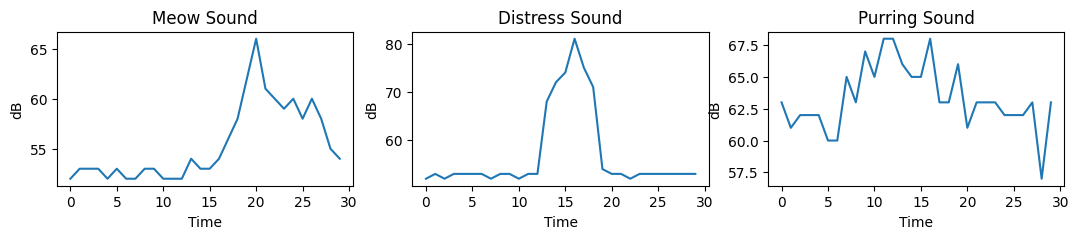

In [ ]:
#@title **ขั้นตอนที่ 6** แสดงตัวอย่างชุดข้อมูลเสียงที่ใช้ในการเทรนโมเดล
#@markdown &emsp;&emsp;&emsp;ในขั้นตอนนี้จะเป็นการแสดงตัวอย่างความรู้สึกของแมวรูปแบบต่างๆ โดยแสดงผลเป็นกราฟของข้อมูลเสียงชุดแรกที่เก็บมาในแต่ละกลุ่ม พร้อมกับไฟล์เสียงตัวอย่างของกลุ่มนั้นๆ
#@markdown สามารถกดรันเพื่อเชื่อมต่อและสั่งการได้เลย โดยประกอบด้วย 4 ปุ่ม ดังต่อไปนี้
#@markdown <ol>6.1 พิมพ์คำที่ต้องการลงในช่อง <strong>Filter</strong> เพื่อ กรองชื่อแถว สำหรับเลือกในข้อ <strong>X</strong><br>
#@markdown 6.2 กดเลือกคอลัมป์ <strong>X</strong> เพื่อ เลือกแถวข้อมูลที่เป็นค่าเสียง<br>
#@markdown 6.3 กดเลือกคอลัมป์ <strong>y</strong> เพื่อ เลือกแถวข้อมูลที่เป็นความรู้สึก<br>
#@markdown 6.4 กดปุ่ม <font color="#3F51B5"><strong>Update Column</strong></font> เพื่อ แสดงผลข้อมูลกับไฟล์เสียงของแต่ละกลุ่ม<br></ol>

import pandas as pd
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import ipywidgets as widgets
from IPython.display import display, HTML, Audio, clear_output
import subprocess
import time
import io

# ฟังก์ชั่นสำหรับดาวน์โหลดข้อมูลจาก GitHub
def run_shell_script():
  # Clone the repository
  subprocess.run(["git", "clone", "https://github.com/hengkp/microbit_ml_examples.git"])

  # Define the function to copy the files
  def getfile(file_name):
      subprocess.run(["cp", "-R", f"microbit_ml_examples/meow mood prediction/{file_name}", file_name])

  # Copy the required files
  getfile("sound_meow.mp3")
  getfile("sound_distress.mp3")
  getfile("sound_purring.mp3")

  # Remove the cloned repository
  subprocess.run(["rm", "-rf", "microbit_ml_examples"])

# ดาวน์โหลดไฟล์เสียง
run_shell_script()

# เขียนฟังก์ชั่นเพื่อแปลงค่าเสียงให้สามารถฟังได้
def interp_sound(data,rate=44100,sec=2):
    x = np.linspace(0, 100, len(data))
    x_new = np.linspace(0, 100, rate*sec)
    f = interpolate.interp1d(x, data)
    data_interp = f(x_new)
    return data_interp


# ฟังก์ชั่นตรวจสอบข้อมูลขั้นตอนที่ 5
def check_variable():
  try:
    columns_data = data.columns.to_list()
    data_cols = [col for col in data.columns if 'sound' in col]
    X = data[data_cols]
    y = data[columns_data[-3]]
    return X, y, columns_data, 1
  except:
    html_status = HTML("<h3 style='margin-left: 13px;'>Status: <font color='red'>ไม่พบตัวแปรชื่อ \"data\" ให้ตรวจสอบและรันคำสั่งในขั้นตอนที่ 5 อีกครั้ง</font><br/></h3>")
    clear_output()
    display(html_status)
    raise ValueError("Variable not found.")

# ตรวจสอบข้อมูลที่ได้จากขั้นตอนที่ 5
X, y, columns_data, is_data = check_variable()

# ฟังก์ชั่นแสดงกราฟพร้อมเสียงตัวอย่าง
def display_sound(X,y):

  # เตรียมชุดข้อมูลเสียงที่ต้องการแสดงผล
  meow_data = X[y == 1].iloc[0].to_numpy()
  distress_data = X[y == 2].iloc[0].to_numpy()
  purring_data = X[y == 3].iloc[0].to_numpy()

  # สร้างพื้นที่สำหรับแสดงผลกราฟ
  fig, axs = plt.subplots(1, 3, figsize=(13, 2))

  # แสดงผลกราฟของเสียงแต่ละประเภท
  axs[0].plot(meow_data)
  axs[0].set_title('Meow Sound')
  axs[0].set_xlabel('Time')
  axs[0].set_ylabel('dB')

  axs[1].plot(distress_data)
  axs[1].set_title('Distress Sound')
  axs[1].set_xlabel('Time')
  axs[1].set_ylabel('dB')

  axs[2].plot(purring_data)
  axs[2].set_title('Purring Sound')
  axs[2].set_xlabel('Time')
  axs[2].set_ylabel('dB')

  # สร้างปุ่มเสียง
  button_layout = widgets.Layout(width='100px', height='30px', margin='0 120px 10px 130px')
  meow_button = widgets.Button(description='Play Meow', layout=button_layout)
  distress_button = widgets.Button(description='Play Distress', layout=button_layout)
  purring_button = widgets.Button(description='Play Purring', layout=button_layout)

  # เขียนฟังก์ชั่นสำหรับเล่นไฟล์เสียง
  def play_meow_sound(_):
      display(Audio("sound_meow.mp3", rate=44100))

  def play_distress_sound(_):
      display(Audio("sound_distress.mp3", rate=44100))

  def play_purring_sound(_):
      display(Audio("sound_purring.mp3", rate=44100))

  # ตั้งค่าปุ่มให้สามารถเล่นเสียงได้
  meow_button.on_click(play_meow_sound)
  distress_button.on_click(play_distress_sound)
  purring_button.on_click(play_purring_sound)

  # สร้างพื้นที่กล่องสำหรับจัดวางปุ่มเสียง
  button_box = widgets.HBox([meow_button, distress_button, purring_button])

  # แสดงกล่องปุ่มเสียง
  display(button_box)

  # แสดงรูปกราฟ
  plt.show()

# สร้างกล่องและปุ่มกดสำหรับเลือก Column
text_filter = widgets.Text(value='s_', placeholder='Enter text', description='Filter:')
title_model = widgets.HTML("<h3 style='margin-left: 10px; font-size: 16px'>Q: กำหนด variable เพื่อแสดงตัวอย่างข้อมูลและไฟล์เสียง</h3>")
filtered_columns = [col for col in data.columns if text_filter.value in col]
dropdown_x = widgets.SelectMultiple(
    options=filtered_columns,
    value=filtered_columns,
    description='X:'
)
dropdown_y = widgets.Dropdown(
    options=data.columns,
    value=data.columns[-2],
    description='y:'
)
dropdown_confirm = widgets.Button(description='Update Column', button_style='primary')
dropdown_confirm.style.button_color = "#3F51B5"
dropdown_confirm.style.font_weight = "bold"

# ฟังก์ชั่นสำหรับอัพเดทชื่อ Column
def text_filter_changed(change):
    filter_text = change.new
    filtered_columns = [col for col in data.columns if filter_text in col]
    dropdown_x.options = filtered_columns
    dropdown_x.value = filtered_columns
text_filter.observe(text_filter_changed, 'value')

# ฟังก์ชั่นสำหรับอัพเดทการแสดงผล
def dropdown_changed(change):
    clear_output()
    display(widgets.VBox([title_model,widgets.HBox([widgets.VBox([text_filter, dropdown_x, dropdown_y]),dropdown_confirm])]))
    selected_columns_x = dropdown_x.value
    selected_column_y = dropdown_y.value
    X = data[list(selected_columns_x)]
    y = data[selected_column_y]
    display_sound(X, y)
dropdown_confirm.on_click(dropdown_changed)

# แสดงผลปุ่มกด
display(widgets.VBox([title_model,widgets.HBox([widgets.VBox([text_filter, dropdown_x, dropdown_y]),dropdown_confirm])]))


In [7]:
#@title **ขั้นตอนที่ 7** การเทรนโมเดล
#@markdown &emsp;&emsp;&emsp;ในขั้นตอนนี้จะเป็นการเรียนรู้การสร้างและเทรนโมเดลจากชุดข้อมูลที่เตรียมไว้​(ตัวแปรชื่อ **data** ที่ได้ในขั้นตอนที่ 5) <br>
#@markdown โดยมีการแสดงผลค่าพารามิเตอร์ที่ได้และรูปกราฟ
#@markdown สามารถกดรันเพื่อเชื่อมต่อและสั่งการได้เลย โดยประกอบด้วย 5 ปุ่มหลัก ดังต่อไปนี้
#@markdown <ol>7.1 พิมพ์คำที่ต้องการลงในช่อง <strong>Filter</strong> เพื่อ กรองชื่อแถว สำหรับเลือกในข้อ <strong>X</strong><br>
#@markdown 7.2 กดเลือกคอลัมป์ <strong>X</strong> เพื่อ เลือกแถวข้อมูลที่เป็น <strong>input_data</strong> <br>
#@markdown 7.3 กดเลือกคอลัมป์ <strong>y</strong> เพื่อ เลือกแถวข้อมูลที่เป็น <strong>label_class</strong> <br>
#@markdown 7.4 กดเลือกคอลัมป์ <strong>Model</strong> เพื่อ เลือกชนิดของโมเดลที่ใช้เทรนให้เหมาะสมกับตัวอย่าง <br>
#@markdown 7.5 กดปุ่ม <font color="#3F51B5"><strong>Start training</strong></font> เพื่อ เริ่มต้นการประมวลผลโมเดล<br></ol>
#@markdown <p>* โมเดลที่ผ่านการเทรนแล้วจะถูกเก็บในตัวแปรชื่อ <strong>"model"</strong></p>

import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from matplotlib.table import Table

# Data and model options
# data = pd.DataFrame(...)  # Replace with your actual data
columns_model = ['Linear Regression', 'Exponential Regression', 'Logistic Regression', 'MLP Classification']

# ซ่อนการแจ้งเตือน
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# ฟังก์ชั่นตรวจสอบข้อมูลขั้นตอนที่ 5
def check_variable():
  try:
    columns_data = data.columns.to_list()
    X_column = columns_data[-2]
    y_column = columns_data[-1]
    return X_column, y_column, columns_data, 1
  except:
    html_status = HTML("<h3 style='margin-left: 13px;'>Status: <font color='red'>ไม่พบตัวแปรชื่อ \"data\" ให้ตรวจสอบและรันคำสั่งในขั้นตอนที่ 5 อีกครั้ง</font><br/></h3>")
    clear_output()
    display(html_status)
    raise ValueError("Variable not found.")

# ตรวจสอบข้อมูลที่ได้จากขั้นตอนที่ 5
X_column, y_column, columns_data, is_data = check_variable()

# สร้างกล่องแสดงผลหลัก
main_box = widgets.VBox()
box1 = widgets.VBox()
box2 = widgets.VBox()
box3 = widgets.HBox()

# Dropdowns for model selection
text_filter = widgets.Text(value='s_', placeholder='Enter text', description='Filter:')
title_model = widgets.HTML("<h3 style='margin-left: 10px; font-size: 16px'>Q: กำหนด variable เพื่อสร้าง model</h3>")
# dropdown_x = widgets.Dropdown(options=data.columns.to_list(), value=data.columns[-2], description='X:')
filtered_columns = [col for col in data.columns if text_filter.value in col]
dropdown_x = widgets.SelectMultiple(
    options=filtered_columns,
    value=filtered_columns,
    description='X:'
)
dropdown_y = widgets.Dropdown(options=data.columns.to_list(), value=data.columns[-2], description='y:')
dropdown_model = widgets.Dropdown(
    options=columns_model,
    value=columns_model[0],
    description='Model:')

# ฟังก์ชั่นสำหรับอัพเดทชื่อ Column
def text_filter_changed(change):
    filter_text = change.new
    filtered_columns = [col for col in data.columns if filter_text in col]
    dropdown_x.options = filtered_columns
    dropdown_x.value = filtered_columns
text_filter.observe(text_filter_changed, 'value')

# สร้างปุ่มเริ่มต้นการ Training
button_start = widgets.Button(description='Start Training', button_style='primary', layout=widgets.Layout(margin='10px 90px'))
button_start.style.button_color = "#3F51B5"
button_start.style.font_weight = "bold"

# Output box
figure_widget = widgets.Output()
table_widget = widgets.Output()
output_box = widgets.VBox([figure_widget, table_widget])

# สร้างกล่องข้อความสำหรับเทรนโมเดล (ทั่วไป) ประกอบด้วย
#   - test_size     : 0.2 (0 - 1) ค่าอัตรา split ใช้สำหรับแยกกลุ่ม train และ test data
#   - random_state  : 42  สำหรับค่าการสุ่มใน split function
#   - fold_valid    : 10  ค่าจำนวนรอบที่ทำ validation
general_model_testsize = widgets.FloatSlider(min=0.0, max=1.0, step=0.1, value=0.2, description='test size:')
general_model_randomstate = widgets.IntText(step=1, value=42, description='random state:')
general_model_foldvalid = widgets.IntSlider(value=10, min=2, max=1000, description='CV folds:')
general_model_box = widgets.VBox([general_model_testsize,
                                  general_model_randomstate,
                                  general_model_foldvalid])

# สร้างกล่องข้อความสำหรับโมเดลแบบ Linear Regression ประกอบด้วย
#   - fit_intercept : True (True/False)
#   - normalize     : False (True/False)
linear_model_fitintercept = widgets.Checkbox(value=True, description='fit intercept:')
# linear_model_normalize = widgets.Checkbox(value=False, description='normalize:')
linear_model_box = widgets.VBox([linear_model_fitintercept])#,
                                #  linear_model_normalize])

# สร้างกล่องข้อความสำหรับโมเดลแบบ Logistic Regression ประกอบด้วย
#   - C             : 1.0
#   - solver        : lbfgs (liblinear, newton-cg, lbfgs, sag, saga)
#   - max_iter      : 100
logistic_model_c = widgets.FloatSlider(value=1.0, min=0.01, max=100.0, step=0.01, description='C:')
logistic_model_solver = widgets.Dropdown(options=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                 value='lbfgs', description='solver:')
logistic_model_maxiter = widgets.IntSlider(value=100, min=1, max=1000, step=1, description='max iter:')
logistic_model_box = widgets.VBox([logistic_model_c,
                                   logistic_model_solver,
                                   logistic_model_maxiter])

# สร้างกล่องข้อความสำหรับโมเดลแบบ MLP classification ประกอบด้วย
#   - hidden_layer_sizes : (100,) or (100, 50)
#   - activation         : relu ("dentity, logistic, tanh, relu)
#   - alpha              : 0.0001
#   - solver             : adam (lbfgs, sgd, adam)
#   - max_iter           : 200
mlp_model_layer = widgets.Text(value='100,50', description='layers:')
mlp_model_activation = widgets.Dropdown(options=['identity', 'logistic', 'tanh', 'relu'],
                                    value='relu', description='activation:')
mlp_model_alpha = widgets.FloatSlider(value=0.0001, min=0.0001, max=1.0, step=0.0001, description='alpha:')
mlp_model_solver = widgets.Dropdown(options=['lbfgs', 'sgd', 'adam'], value='adam', description='solver:')
mlp_model_maxiter = widgets.IntSlider(value=200, min=1, max=1000, step=1, description='max iter:')
mlp_model_box = widgets.VBox([mlp_model_layer,
                              mlp_model_activation,
                              mlp_model_alpha,
                              mlp_model_solver,
                              mlp_model_maxiter])

# ฟังก์ชั่นสำหรับแสดงตัวแปรอื่นๆ ตามชนิดของโมเดล
def update_box2(change):
    model_name = dropdown_model.value
    if model_name == 'Linear Regression':
        box2.children = [dropdown_model, linear_model_box]
    elif model_name == 'Exponential Regression':
        box2.children = [dropdown_model, linear_model_box]
    elif model_name == 'Logistic Regression':
        box2.children = [dropdown_model, logistic_model_box]
    elif model_name == 'MLP Classification':
        box2.children = [dropdown_model, mlp_model_box]

# ฟังก์ชั่นสำหรับเริ่มต้นการเทรนโมเดล
def button_start_clicked(b):
    clear_output()

    html_status = HTML("<h3 style='margin-left: 13px;'>Status: <font color='#9b9b9b'>ดำเนินการประมวลผลข้อมูล <strong>\"data\"</strong> จากขั้นตอนที่ 5...</font></h3>")
    display(html_status)

    # เลือกชุดข้อมูล
    # X = data[dropdown_x.value].values.reshape(-1, 1)
    if not dropdown_model.value == 'MLP Classification':
        X = data[list(dropdown_x.value)].values.reshape(-1, 1)
    else:
        if len(dropdown_x.value) == 1:
            X = np.array(data[dropdown_x.value[0]].to_list()).reshape(len(data[dropdown_x.value[0]]), -1)
        else:
            X = data[list(dropdown_x.value)].values
    y = data[dropdown_y.value].values

    # แบ่งข้อมูลสำหรับ training และ testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=general_model_testsize.value, random_state=general_model_randomstate.value)

    # เทรนโมเดล
    if dropdown_model.value == 'Linear Regression':
        model, accuracy = run_linear_regression(X_train, y_train, X_test, y_test)
    elif dropdown_model.value == 'Exponential Regression':
        model, accuracy = run_exponential_regression(X_train, y_train, X_test, y_test)
    elif dropdown_model.value == 'Logistic Regression':
        if not len(data[dropdown_y.value].unique()) == 2:
            html_status = HTML("<h3 style='margin-left: 13px;'>Status: <font color='red'>ชุดข้อมูลไม่สามารถเทรนด้วย <strong>Logistic Regreesion Model</strong> ได้ โปรดเลือกโมเดลชนิดอื่น</font><br/></h3>")
            display(html_status)
            raise ValueError("Cannot train the data with Logistic Regression Model.")
        model, accuracy = run_logistic_regression(X_train, y_train, X_test, y_test)
    elif dropdown_model.value == 'MLP Classification':
        model, accuracy = run_mlp_classification(X_train, y_train, X_test, y_test)

    # เก็บโมเดลในตัวแปร
    globals()['model'] = model

    # ทำ cross validation
    cv_scores = cross_val_score(model, X, y, cv=general_model_foldvalid.value)
    # Create an empty list to store the results
    results = []

    # Perform cross-validation
    if dropdown_model.value == 'Exponential Regression':
        y_log = np.log(y)
        valid_indices = np.logical_and(np.isfinite(y_log), y_log != 0)
        X_valid = X[valid_indices]
        y_valid = y_log[valid_indices]
        cv_results = cross_validate(model, X_valid, y_valid, cv=general_model_foldvalid.value, return_estimator=True)
    else:
        cv_results = cross_validate(model, X, y, cv=general_model_foldvalid.value, return_estimator=True)

    # Retrieve the parameters and scores for each fold
    for fold_idx, (estimator, score) in enumerate(zip(cv_results['estimator'], cv_results['test_score']), start=1):
        # Create a dictionary to store the fold results
        fold_results = {'Fold': fold_idx, 'Score': score}

        # Check the model type and extract the fitted parameters accordingly
        if dropdown_model.value == 'Linear Regression':
            fitted_parameters = {'Coefficient': estimator.coef_[0], 'Intercept': estimator.intercept_}
            fold_results.update(fitted_parameters)

        elif dropdown_model.value == 'Exponential Regression':
            fitted_parameters = {'Coefficient': estimator.coef_[0], 'Intercept': estimator.intercept_}
            fold_results.update(fitted_parameters)

        elif dropdown_model.value == 'Logistic Regression':
            fitted_parameters = {'Coefficient': estimator.coef_[0]}
            fold_results.update(fitted_parameters)

        elif dropdown_model.value == 'MLP Classification':
            fitted_parameters = {'Layer {}: Parameter {}'.format(i+1, j+1): param.flatten()
                                for i, param in enumerate(estimator.coefs_) for j in range(param.size)}
            fold_results.update(fitted_parameters)

        # Append the fold results to the list
        results.append(fold_results)

    # Create a data frame from the results
    results_df = pd.DataFrame(results)

    # Calculate the column-wise average
    average_values = results_df.mean()

    # Add the average values as the last row in the DataFrame
    results_df.loc['AVG'] = average_values

    # Reorder the columns to have 'Fold' and 'Score' as the first columns
    results_df = results_df[['Fold', 'Score'] + [col for col in results_df.columns if col not in ['Fold', 'Score']]]

    clear_output()

    # Display graph
    with figure_widget:
        clear_output()
        fig, ax = plt.subplots(1, 2, figsize=(12,6))
        display_training_result(ax[0], X_train, y_train, X_test, y_test, model, accuracy)
        display_cross_validation(ax[1], results_df['Score'])
        plt.show()

    # Display the results
    with table_widget:
        clear_output()
        display(results_df)

    display(main_box)

# ฟังก์ชั่นสำหรับ Training ด้วย Linear Regression Model
def run_linear_regression(X_train, y_train, X_test, y_test):
    model = LinearRegression(fit_intercept=linear_model_fitintercept.value) #, normalize=linear_model_normalize.value
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return model, r2

# ฟังก์ชั่นสำหรับ Training ด้วย Linear Regression Model สำหรับ Exponential Data
def run_exponential_regression(X_train, y_train, X_test, y_test):
    y_train_log = np.log(y_train)
    y_test_log = np.log(y_test)

    train_valid_indices = np.logical_and(np.isfinite(y_train_log), y_train_log != 0)
    X_train_valid = X_train[train_valid_indices]
    y_train_valid = y_train_log[train_valid_indices]

    test_valid_indices = np.logical_and(np.isfinite(y_test_log), y_test_log != 0)
    X_test_valid = X_test[test_valid_indices]
    y_test_valid = y_test_log[test_valid_indices]

    model = LinearRegression(fit_intercept=linear_model_fitintercept.value)
    model.fit(X_train_valid, y_train_valid)
    y_pred = model.predict(X_test_valid)
    r2 = r2_score(y_test_valid, y_pred)
    return model, r2

# ฟังก์ชั่นสำหรับ Training ด้วย Logistic Regression Model
def run_logistic_regression(X_train, y_train, X_test, y_test, ax=[]):
    model = LogisticRegression(C=logistic_model_c.value, solver=logistic_model_solver.value,
                               max_iter=logistic_model_maxiter.value)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return model, accuracy

# ฟังก์ชั่นสำหรับ Training ด้วย MLP Classification Model
def run_mlp_classification(X_train, y_train, X_test, y_test, ax=[]):
    hidden_layers = tuple(map(int, mlp_model_layer.value.split(',')))
    model = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=mlp_model_activation.value,
                          alpha=mlp_model_alpha.value, solver=mlp_model_solver.value,
                          max_iter=mlp_model_maxiter.value)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return model, accuracy

# ฟังก์ชั่นสำหรับแสดงผลการเทรนในรูปแบบกราฟ
def display_training_result(ax, X_train, y_train, X_test, y_test, model, score):

    # กำหนดตัวแปรแสดงผลจากชนิดของโมเดล
    if dropdown_model.value == 'Linear Regression':

        # แสดงผลกราฟของชุดข้อมูล
        ax.scatter(X_train, y_train, color='#2196F3', label='Training Data')
        ax.scatter(X_test, y_test, color='#F44336', label='Testing Data')

        x_min, x_max = ax.get_xlim()
        y_min, y_max = ax.get_ylim()

        # แสดงสมการและค่า R-square ลงบนกราฟ
        annotation_text1 = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
        annotation_text2 = f'R-square = {score:.2f}'

        # แสดงผลเส้นกราฟของโมเดล (regression line)
        x_line = np.linspace(x_min, x_max, 2)
        y_line = model.coef_[0] * x_line + model.intercept_
        ax.plot(x_line, y_line, linestyle='dashed', color='#607D8B', label='Regression Line')
        ax.set_title('Linear Regression Model')

    # กำหนดตัวแปรแสดงผลจากชนิดของโมเดล
    elif dropdown_model.value == 'Exponential Regression':

        # แสดงผลกราฟของชุดข้อมูล
        ax.scatter(X_train, np.log(y_train), color='#2196F3', label='Training Data')
        ax.scatter(X_test, np.log(y_test), color='#F44336', label='Testing Data')

        x_min, x_max = ax.get_xlim()
        y_min, y_max = ax.get_ylim()

        # แสดงสมการและค่า R-square ลงบนกราฟ
        annotation_text1 = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
        annotation_text2 = f'R-square = {score:.2f}'

        # แสดงผลเส้นกราฟของโมเดล (regression line)
        x_line = np.linspace(x_min, x_max, 2)
        y_line = model.coef_[0] * x_line + model.intercept_
        ax.plot(x_line, y_line, linestyle='dashed', color='#607D8B', label='Regression Line')
        ax.set_title('Exponential Regression Model')

    elif dropdown_model.value == 'Logistic Regression':

        # แสดงผลกราฟของชุดข้อมูล
        label_names = np.unique(y_train)
        ax.scatter(X_train[y_train == label_names[0]], [0] * np.sum(y_train == label_names[0]), c='#2196F3', label=label_names[0])
        ax.scatter(X_train[y_train == label_names[1]], [1] * np.sum(y_train == label_names[1]), c='#F44336', label=label_names[1])

        x_min, x_max = ax.get_xlim()
        y_min, y_max = ax.get_ylim()

        # แสดงสมการและค่า Accuracy ลงบนกราฟ
        annotation_text1 = f'y = 1 / (1 + e^(-({model.coef_[0][0]:.2f}*x + {model.intercept_[0]:.2f})))'
        annotation_text2 = f'Accuracy: {score:.2f}'

        # แสดงผลเส้นกราฟของโมเดล
        x_range = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_pred = model.predict_proba(x_range)
        y_prop = y_pred[:, 1]  # Probability of being '1'
        ax.plot(x_range, y_prop, c='#607D8B', label='Decision Boundary')

    elif dropdown_model.value == 'MLP Classification':

        # แสดงผลกราฟของชุดข้อมูล
        labels = np.unique(y_test)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        for i in range(len(labels)):
            for j in range(len(labels)):
                ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

        # แสดงค่า Accuracy ลงบนกราฟ
        annotation_text1 = ""
        annotation_text2 = f'Accuracy: {score:.2f}'

    # แสดงสมการและค่า R-square ลงบนกราฟ
    ax.text(0.95, 0.1, annotation_text1, transform=ax.transAxes, ha='right')
    ax.text(0.95, 0.05, annotation_text2, transform=ax.transAxes, ha='right')

    # กำหนดชื่อแกนในกราฟ
    if dropdown_model.value == 'Exponential Regression':
        ax.set_xlabel(dropdown_x.value)
        ax.set_ylabel("Log( {} )".format(dropdown_y.value))
    elif dropdown_model.value == 'MLP Classification':
        ax.set_title('Confusion Matrix')
        tick_marks = np.arange(len(labels))
        ax.set_xticks(tick_marks, labels, rotation=45)
        ax.set_yticks(tick_marks, labels)
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.set_xlabel(dropdown_x.value)
        ax.set_ylabel(dropdown_y.value)

    # แสดงผลชื่อชุดข้อมูลในกราฟ
    if not dropdown_model.value == 'MLP Classification':
        ax.legend(loc='upper left')


# ฟังก์ชั่นสำหรับแสดงผล Cross Validation
def display_cross_validation(ax, cv_scores):

    # Display 10-fold cross-validation scores
    ax.plot(range(1, general_model_foldvalid.value + 1), cv_scores[:-1], marker='o', color='#4CAF50')
    ax.set_xlabel('Fold')

    # กำหนดตัวแปรแสดงผลจากชนิดของโมเดล
    if dropdown_model.value == 'Linear Regression':
        ax.set_ylabel('R2 Score')
        ax.set_title('Cross-Validation for Linear Regression')
        pass
    if dropdown_model.value == 'Exponential Regression':
        ax.set_ylabel('R2 Score')
        ax.set_title('Cross-Validation for Exponential Regression')
        pass
    elif dropdown_model.value == 'Logistic Regression':
        ax.set_ylabel('Accuracy')
        ax.set_title('Cross-Validation for Logistic Regression')
        pass
    elif dropdown_model.value == 'MLP Classification':
        ax.set_ylabel('Accuracy')
        ax.set_title('Cross-Validation for MLP Classification')
        pass


# Register button callbacks
button_start.on_click(button_start_clicked)

# Build the UI layout
box1.children = [text_filter,dropdown_x, dropdown_y, button_start]
box2.children = [dropdown_model, linear_model_box]
box3.children = [box1, general_model_box, box2]
main_box.children = [title_model, box3, output_box]

# Register dropdown callback
dropdown_model.observe(update_box2, names='value')

# Display the main box
display(main_box)


In [ ]:
#@title **ขั้นตอนที่ 8** การทำนายผลค่าต่างๆที่ได้รับจาก Micro:Bit ผ่านโมเดลที่เตรียมไว้
#@markdown &emsp;&emsp;&emsp;ในขั้นตอนนี้จะเป็นการนำข้อมูลที่ได้จาก Micro:Bit มาใช้ในการทำนายปริมาณน้ำผ่านโมเดลที่เตรียมไว้
#@markdown และส่งข้อมูลกลับไปยัง Micro:Bit<br>
#@markdown สามารถกดรันเพื่อเชื่อมต่อและสั่งการได้เลย โดยประกอบด้วย 7 ปุ่ม ดังต่อไปนี้
#@markdown <ol>8.1 กดปุ่ม <font color="#4CAF50"><strong>Connect Micro:Bit</strong></font> จากนั้น เลือกเชื่อมต่อกับอุปกรณ์ <br>
#@markdown 8.2 กดปุ่ม <font color="#FF5722"><strong>Remove Latest Row</strong></font> เมื่อต้องการลบข้อมูลในแถวสุดท้าย<br>
#@markdown 8.3 กดปุ่ม <font color="#2196F3"><strong>Get data</strong></font> เพื่อ เก็บข้อมูลแบบเรียลไทม์<br>
#@markdown 8.4 กดปุ่ม <font color="#F44336"><strong>Decrease ▼</strong></font> เพื่อ ลดค่าของ <strong>label_class</strong> (สังเกตได้ที่หน้าจอ Micro:Bit)<br>
#@markdown 8.5 กดปุ่ม <font color="#FF9800"><strong>Increase ▲</strong></font> เพื่อ เพิ่มค่าของ <strong>label_class</strong> (สังเกตได้ที่หน้าจอ Micro:Bit)<br>
#@markdown 8.6 กดปุ่ม <font color="#2196F3"><strong>Send data</strong></font> เพื่อ นำข้อมูลแบบเรียลไทม์มาคำนวนค่าการทำนายและส่งค่ากลับไปยัง Micro:Bit<br>
#@markdown 8.7 กดปุ่ม <font color="#607D8B"><strong>Export</strong></font> เพื่อ ดาวน์โหลดข้อมูลในรูปแบบไฟล์ CSV (สามารถเปลี่ยนชื่อไฟล์ได้)</ol>
#@markdown <p>* ข้อมูลที่ได้จะถูกเก็บในตัวแปรชื่อ <strong>"jdata"</strong> และ <strong>"jheader"</strong></p>
#@markdown <p>** ผู้เรียนสามารถแก้ไขชื่อ <strong>header</strong> ในตารางได้โดยการคลิกคำที่ต้องการเปลี่ยน</p>
#@markdown <p>*** กดปุ่ม <font color="#4CAF50"><strong>"Disconnect Micro:Bit"</strong></font> ใน<strong>ขั้นตอนที่ 4</strong> ให้เรียบร้อยก่อนเริ่มขั้นตอนนี้เสมอ</p>

from IPython.display import display, HTML, Javascript, clear_output
from google.colab import output
import json

# ตรวจสอบตัวแปรชื่อ "Model"
if not ("model" in globals() or "model" in locals()):
    html_status = HTML("<h3 style='margin-left: 13px;'>Status: <font color='red'>ไม่พบตัวแปรชื่อ \"model\" ให้ตรวจสอบและรันคำสั่งในขั้นตอนที่ 6 อีกครั้ง</font><br/></h3>")
    clear_output()
    display(html_status)
    raise ValueError("Variable not found.")

# ประกาศตัวแปรสำหรับเก็บข้อมูล
globals()['jdata'] = []
globals()['jheader'] = []

# ฟังก์ชั่นสำหรับเก็บข้อมูลลง Notebook
def receiveData(data):
    globals()['jdata'].append(data)

# ฟังก์ชั่นสำหรับเก็บหัวตารางลง Notebook
def receiveHeader(header):
    globals()['jheader'] = header

# ฟังก์ชั่นสำหรับลบข้อมูลบรรทัดสุดท้าย
def removeLatestRow():
    if globals()['jdata']:
        globals()['jdata'].pop()

# ฟังก์ชั่นสำหรับ Predict Class
def appliedModel(data):
    try:
        input_data = [[data[:-2]]]
        output_data = model.predict(input_data)
        return np.round(output_data[0])
    except:
        return 0

# ลงทะเบียนฟังก์ชั่นสำหรับใช้ใน Javascript
output.register_callback('notebook.receiveData', receiveData)
output.register_callback('notebook.receiveHeader', receiveHeader)
output.register_callback('notebook.removeLatestRow', removeLatestRow)
output.register_callback('notebook.appliedModel', appliedModel)

# โปรแกรมการทำงาน Javascript
js_code = '''
// Define Initial Parameters
let port = undefined;
let reader = undefined;
let writer = undefined;
let isConnected = false;
let myData = '';
let wdata = ";";
let dataTable = [];
let headers = ["Index", "s_1", "s_2", "s_3", "s_4", "s_5", "s_6", "s_7", "s_8", "s_9", "s_10", "s_11", "s_12", "s_13", "s_14", "s_15", "s_16", "s_17", "s_18", "s_19", "s_20", "s_21", "s_22", "s_23", "s_24", "s_25", "s_26", "s_27", "s_28", "s_29", "s_30", "feeling", "runtime","predict"];

const encoder = new TextEncoder();
const decoder = new TextDecoder();

// Create "Connect to Micro:Bit" Button
const connectButton = document.createElement("button");
connectButton.innerHTML = "Connect Micro:bit";
connectButton.style.margin = "3px";
connectButton.style.fontSize = "14px";
connectButton.style.padding = "9px";
connectButton.style.borderRadius = "2px";
connectButton.style.border = "none";
connectButton.style.color = "white";
connectButton.style.backgroundColor = "#4CAF50";
connectButton.style.cursor = "pointer";
document.querySelector("#output-area").appendChild(connectButton);

// Create "Remove Last Row" Button
const removeRowButton = document.createElement("button");
removeRowButton.innerHTML = "Remove Latest Row";
removeRowButton.style.margin = "3px";
removeRowButton.style.fontSize = "14px";
removeRowButton.style.padding = "9px";
removeRowButton.style.borderRadius = "2px";
removeRowButton.style.border = "none";
removeRowButton.style.color = "white";
removeRowButton.style.backgroundColor = "#FF5722";
removeRowButton.style.cursor = "pointer";
document.querySelector("#output-area").appendChild(removeRowButton);

// Create "Get Data" Button
const getDataButton = document.createElement("button");
getDataButton.innerHTML = "Get Data";
getDataButton.style.margin = "3px";
getDataButton.style.fontSize = "14px";
getDataButton.style.padding = "9px";
getDataButton.style.borderRadius = "2px";
getDataButton.style.border = "none";
getDataButton.style.color = "white";
getDataButton.style.backgroundColor = "#2196F3";
getDataButton.style.cursor = "pointer";
document.querySelector("#output-area").appendChild(getDataButton);

// Create "Decrease" Button
const decreaseButton = document.createElement("button");
decreaseButton.innerHTML = "Decrease ▼";
decreaseButton.style.margin = "3px";
decreaseButton.style.fontSize = "14px";
decreaseButton.style.padding = "9px";
decreaseButton.style.borderRadius = "2px";
decreaseButton.style.border = "none";
decreaseButton.style.color = "white";
decreaseButton.style.backgroundColor = "#F44336";
decreaseButton.style.cursor = "pointer";
document.querySelector("#output-area").appendChild(decreaseButton);

// Create "Increase" Button
const increaseButton = document.createElement("button");
increaseButton.innerHTML = "Increase ▲";
increaseButton.style.margin = "3px";
increaseButton.style.fontSize = "14px";
increaseButton.style.padding = "9px";
increaseButton.style.borderRadius = "2px";
increaseButton.style.border = "none";
increaseButton.style.color = "white";
increaseButton.style.backgroundColor = "#FF9800";
increaseButton.style.cursor = "pointer";
document.querySelector("#output-area").appendChild(increaseButton);

// Create "Send Data" Button
const sendDataButton = document.createElement("button");
sendDataButton.innerHTML = "Send Data";
sendDataButton.style.margin = "3px";
sendDataButton.style.fontSize = "14px";
sendDataButton.style.padding = "9px";
sendDataButton.style.borderRadius = "2px";
sendDataButton.style.border = "none";
sendDataButton.style.color = "white";
sendDataButton.style.backgroundColor = "#2196F3";
sendDataButton.style.cursor = "pointer";
document.querySelector("#output-area").appendChild(sendDataButton);

// Create "Filename" Input
const filenameInput = document.createElement("input");
filenameInput.type = "text";
filenameInput.placeholder = "data.csv";
filenameInput.style.margin = "3px";
filenameInput.style.padding = "9px";
filenameInput.style.fontSize = "14px";

// Create "Save As" label
const saveAsText = document.createElement("span");
saveAsText.textContent = "Save As: ";
saveAsText.style.margin = "3px";
saveAsText.style.padding = "9px";
saveAsText.style.fontSize = "14px";

// Create Export Button
const exportButton = document.createElement("button");
exportButton.innerHTML = "Export";
exportButton.style.margin = "3px";
exportButton.style.fontSize = "14px";
exportButton.style.padding = "9px";
exportButton.style.borderRadius = "2px";
exportButton.style.border = "none";
exportButton.style.color = "white";
exportButton.style.backgroundColor = "#607D8B";
exportButton.style.cursor = "pointer";

// Create Container for Export Area
const container = document.createElement("div");
container.style.margin = "3px";
container.appendChild(saveAsText);
container.appendChild(filenameInput);
container.appendChild(exportButton);
document.querySelector("#output-area").appendChild(container);

// Create Table Area
const resultTable = document.createElement("table");
resultTable.style.margin = "16px 3px 3px 3px";
resultTable.style.borderCollapse = "collapse";
resultTable.style.fontFamily = "Arial, sans-serif";
resultTable.style.fontSize = "14px";
resultTable.style.width = "50%";
resultTable.style.border = "1px solid black"; // Add border style
document.querySelector("#output-area").appendChild(resultTable);

// Add style for table cells
const cellStyle = "padding: 8px; text-align: center; border: 1px solid black;";
resultTable.style.cellSpacing = "0"; // Remove spacing between cells

// Collect updated headers
const updateHeaders = () => {
  // Exclude the first header ("Index")
  const updatedHeaders = headers.slice(1);
  google.colab.kernel.invokeFunction('notebook.receiveHeader', [updatedHeaders], {});
};

// Update the createTable function to apply cell style
const createTable = () => {
  resultTable.innerHTML = "";
  const thead = document.createElement("thead");
  const tbody = document.createElement("tbody");
  const headRow = document.createElement("tr");

  headers.forEach((header, index) => {
    const th = document.createElement("th");
    th.textContent = header;
    if (index === 0) {
      th.style = `${cellStyle} width: 60px;`; // Fixed width for the "Index" column header
    } else {
      th.style = cellStyle;
    }
    headRow.appendChild(th);
  });

  thead.appendChild(headRow);
  resultTable.appendChild(thead);
  resultTable.appendChild(tbody);

  // Add click event listener to header cells
  const headerCells = resultTable.querySelectorAll("th");
  headerCells.forEach((cell) => {
    cell.addEventListener("click", () => {
      const currentHeaderText = cell.textContent;
      const input = document.createElement("input");
      input.type = "text";
      input.value = currentHeaderText;
      input.addEventListener("blur", () => {
        const newHeaderText = input.value.trim();
        if (newHeaderText) {
          cell.textContent = newHeaderText;
        }
        input.remove();

        // Collect updated headers
        updateHeaders();
      });
      cell.textContent = "";
      cell.appendChild(input);
      input.focus();
    });
  });

  // Invoke the function to collect the headers initially
  updateHeaders();
};

// Update the content in dataTable
const updateTable = (data) => {
  const tbody = resultTable.querySelector("tbody");
  tbody.innerHTML = "";

  data.forEach((row, index) => {
    const dataRow = document.createElement("tr");

    // Add index column
    const indexCell = document.createElement("td");
    indexCell.style = `${cellStyle} width: 60px;`; // Adjust width of index column
    indexCell.textContent = index + 1; // Add 1 to the index to start from 1 instead of 0
    dataRow.appendChild(indexCell);

    row.forEach((data) => {
      const dataCell = document.createElement("td");
      dataCell.style = cellStyle;
      dataCell.textContent = data;
      dataRow.appendChild(dataCell);
    });

    tbody.appendChild(dataRow);
  });
};

// Display the dataTable
createTable();

// Receive the data and invoke collecting "result" function
const receiveData = async () => {
  while (true) {
    const { value, done } = await reader.read();
    myData += decoder.decode(value);

    if (myData.endsWith("\\r\\n")) {
      const completeData = myData.trim().replace(" ", "").split("\\r\\n").slice(-2);

      if (completeData.length !== 1) {
        console.error("Invalid completeData format:", myData);
        myData = '';
        continue;
      }
      const collectData = completeData[0].split(",").map(Number);

      // Calculate the mean of the current collectData list (except the last two values)
      const mean = collectData.slice(0, -2).reduce((a, b) => a + b, 0) / (collectData.length - 2);

      // Create a new list and fill it with the mean value
      const filledList = Array(32).fill(0);

      // Copy the values from the current collectData list to the new list
      for (let i = 0; i < collectData.length - 2; i++) {
        filledList[i] = collectData[i];
      }

      // Copy the last two values from the current collectData list to the new list
      filledList[30] = collectData[collectData.length - 2];
      filledList[31] = collectData[collectData.length - 1];

      if (filledList.length !== 32) {
        console.error("Invalid collectData format:", myData);
        myData = '';
        continue;
      }
      google.colab.kernel.invokeFunction('notebook.receiveData', [filledList], {});

      dataTable.push(filledList);
      updateTable(dataTable);
      myData = '';
    }

    if (done) break;
  }
};

// Open Port and make connection to Micro:Bit
connectButton.onclick = async () => {
  if (isConnected) {
    if (port && port.readable && port.writable) {
      if (reader !== undefined) {
        await reader.releaseLock();
      }
      if (writer !== undefined) {
        await writer.releaseLock();
      }
      if (!port.readable.locked && !port.writable.locked) {
        await port.close();
        port = undefined;
        connectButton.innerHTML = "Connect Micro:bit";
        isConnected = false;
      }
    }
    return;

  } else {
    try {
      port = await navigator.serial.requestPort();
      await port.open({ baudRate: 115200 });
      connectButton.innerHTML = "Disconnect Micro:bit";
      isConnected = true;

      if (reader !== undefined) {
        await reader.releaseLock();
      }
      reader = port.readable.getReader();

      if (writer !== undefined) {
        await writer.releaseLock();
      }
      writer = port.writable.getWriter();
      receiveData();

    } catch (error) {
      port = undefined;
      connectButton.innerHTML = "Connect Micro:bit";
      isConnected = false;
      console.error(error);
    }
  }
};

// Remove the latest row and Update Table Data
removeRowButton.onclick = () => {
  google.colab.kernel.invokeFunction('notebook.removeLatestRow', [], {});
  dataTable.pop();
  updateTable(dataTable);
};

// Send "$" to the microbit and receive data
getDataButton.onclick = async () => {
  if (isConnected && port && port.writable) {
    try {
      await writer.write(encoder.encode("#$#"));
      receiveData();
    } catch (error) {
      console.error("Error writing data:", error);
    }
  } else {
    console.error("Micro:bit not connected or port not writable.");
  }
};

// Send "," to the microbit
decreaseButton.onclick = async () => {
  if (isConnected && port && port.writable) {
    try {
      await writer.write(encoder.encode("#,#"));
    } catch (error) {
      console.error("Error writing data:", error);
    }
  } else {
    console.error("Micro:bit not connected or port not writable.");
  }
};

// Send "." to the microbit
increaseButton.onclick = async () => {
  if (isConnected && port && port.writable) {
    try {
      await writer.write(encoder.encode("#.#"));
    } catch (error) {
      console.error("Error writing data:", error);
    }
  } else {
    console.error("Micro:bit not connected or port not writable.");
  }
};

// Send "/" to the microbit
sendDataButton.onclick = async () => {
  if (isConnected && port && port.writable) {
    try {
      await writer.write(encoder.encode("#$#"));

      while (true) {
        const { value, done } = await reader.read();
        myData += decoder.decode(value);

        if (myData.endsWith("\\r\\n")) {
          const completeData = myData.trim().replace(" ", "").split("\\r\\n").slice(-2);
          console.log("completeData: " + completeData)

          if (completeData.length !== 1) {
            console.error("Invalid completeData format:", myData);
            myData = '';
            continue;
          }

          const collectData = completeData[0].split(",").map(Number);
          console.log("collectData: " + collectData)

          // Calculate the mean of the current collectData list (except the last two values)
          const mean = collectData.slice(0, -2).reduce((a, b) => a + b, 0) / (collectData.length - 2);

          // Create a new list and fill it with the mean value
          const filledList = Array(32).fill(0);

          // Copy the values from the current collectData list to the new list
          for (let i = 0; i < collectData.length - 2; i++) {
            filledList[i] = collectData[i];
          }

          // Copy the last two values from the current collectData list to the new list
          filledList[30] = collectData[collectData.length - 2];
          filledList[31] = collectData[collectData.length - 1];

          if (filledList.length !== 32) {
            console.error("Invalid collectData format:", myData);
            myData = '';
            continue;
          }

          try {
            const result = await google.colab.kernel.invokeFunction('notebook.appliedModel', [filledList], {});
            const resultValue = result.data["text/plain"];
            console.log("result: ", resultValue);

            try {
                const senderMessage = "#/" + resultValue + "#"; // Use result.data to access the returned value
                await writer.write(encoder.encode(senderMessage));
              } catch (error) {
                console.error("Error writing data:", error);
              }

            const combinedData = filledList.concat(resultValue);
            console.log("combinedData: ",combinedData)
            google.colab.kernel.invokeFunction('notebook.receiveData', [combinedData], {});
            dataTable.push(combinedData);
            updateTable(dataTable);

          } catch (error) {
            // Handle any error that occurred during the function invocation
            console.error("Error invoking function:", error);
          }

          myData = '';
        }
        if (done) break;
      }
    } catch (error) {
      console.error("Error writing data:", error);
    }
  } else {
    console.error("Micro:bit not connected or port not writable.");
  }
};

// Export Table as CSV file
exportButton.onclick = async () => {
  if (dataTable.length === 0) {
    console.error("No data available to export.");
    return;
  }

  const defaultFilename = "data.csv";
  const userInput = filenameInput.value;
  const filename = userInput.trim() || defaultFilename;
  const csvContent = "data:text/csv;charset=utf-8," + convertToCSV(dataTable);
  const encodedUri = encodeURI(csvContent);
  const link = document.createElement("a");
  link.setAttribute("href", encodedUri);
  link.setAttribute("download", filename);
  link.style.display = "none";
  document.body.appendChild(link);
  link.click();
  document.body.removeChild(link);
};

// Helper function to convert the data array to CSV format
const convertToCSV = (data) => {
  const table = document.createElement("table");
  table.innerHTML = resultTable.innerHTML;

  const headers = Array.from(table.querySelectorAll("th")).map((th) => th.textContent.trim());
  headers.shift(); // Remove the first element (Index column)

  const rows = data.map((row, index) => [...row]);
  const csvArray = [headers, ...rows].map((row) => row.join(","));
  return csvArray.join("\\n");
};

'''
display(Javascript(js_code))

<IPython.core.display.Javascript object>

\* ไฟล์เนื้อหาทั้งหมดรวมถึงโมเดลและชุดข้อมูลสำหรับการทำนายความรู้สึกของแมวนี้ สามารถเข้าไปศึกษาเพิ่มเติมและดาวน์โหลดได้ที่[ https://github.com/hengkp/microbit_ml_examples](https://github.com/hengkp/microbit_ml_examples)

Reference Website. [The 10 main sounds a cat makes](https://www.fundacion-affinity.org/en/dogs-cats-and-people/i-have-pet/10-main-sounds-cat-makes).